In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv("/content/drive/MyDrive/DATA SET/BIKE DETAILS.csv")

In [69]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [71]:
df["selling_price"]

,selling_price
0,175000
1,45000
2,150000
3,65000
4,20000
...,...
1056,17000
1057,16000
1058,15000
1059,12000


In [72]:
#1.What is the range of selling prices in the dataset
min_selling_price = df["selling_price"].min()
max_selling_price = df["selling_price"].max()

print(f"Range of Selling Prices: {min_selling_price} to {max_selling_price} INR")

Range of Selling Prices: 5000 to 760000 INR


In [73]:
#2. What is the median selling price for bikes in the dataset
median_selling_price = df["selling_price"].median()

print(f"Median Selling Price: {median_selling_price} INR")

Median Selling Price: 45000.0 INR


In [74]:
#3.What is the most common seller type
most_common_seller_type = df["seller_type"].value_counts().idxmax()
print(f"most common seller type is : {most_common_seller_type}")

most common seller type is : Individual


In [75]:
#4.How many bikes have driven more than 50,000 kilometers
bikes_driven_more_than_50k = (df["km_driven"] > 50000).sum()

print(f"Number of bikes driven more than 50,000 kilometers: {bikes_driven_more_than_50k} bikes")


Number of bikes driven more than 50,000 kilometers: 170 bikes


In [76]:
#5.What is the average km_driven value for each ownership type
average_km_driven_by_ownership = df.groupby("owner")["km_driven"].mean()

print("Average km_driven value for each ownership type:")
print(average_km_driven_by_ownership)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [77]:
#6.What proportion of bikes are from the year 2015 or older
bikes_from_2015_or_older = (df["year"] >= 2015).mean()*100
bikes_from_2015_or_older

52.780395852968894

In [78]:
#7.What is the trend of missing values across the dataset
missing_values_trend = df.isnull().sum()

print("Trend of missing values across the dataset:")
print(missing_values_trend)

Trend of missing values across the dataset:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [79]:
#8.What is the highest ex_showroom_price recorded, and for which bike
highest_ex_showroom_price = df["ex_showroom_price"].max()
df[df["ex_showroom_price"] == highest_ex_showroom_price]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [80]:
#9.What is the total number of bikes listed by each seller type
total_bikes_by_seller_type = df["seller_type"].value_counts()

print("Total number of bikes listed by each seller type:")
print(total_bikes_by_seller_type)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


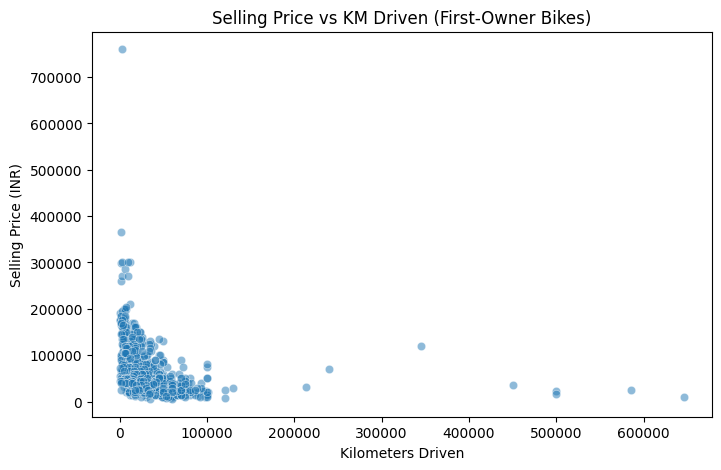

In [81]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

#correlation
correlation_selling_price_km_driven = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'], alpha=0.5)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.title("Selling Price vs KM Driven (First-Owner Bikes)")
plt.show()

In [82]:
#11.Identify and remove outliers in the km_driven column using the IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print the number of removed outliers
outliers_removed = df.shape[0] - df_cleaned.shape[0]
print(f"Outliers removed: {outliers_removed}")

Outliers removed: 39


In [83]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

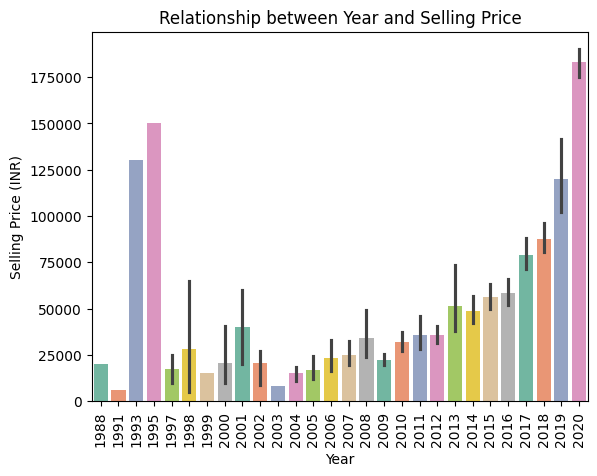

In [84]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.barplot(x="year", y = "selling_price", data = df, palette = "Set2")
plt.xlabel("Year")
plt.ylabel("Selling Price (INR)")
plt.xticks(rotation=90)
plt.title("Relationship between Year and Selling Price")
plt.show()

In [85]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
# Define current year
current_year = 2025

# Calculate bike age
df['bike_age'] = current_year - df['year']

# Compute average depreciation
avg_depreciation = df.groupby('bike_age')[['ex_showroom_price', 'selling_price']].mean()
avg_depreciation['depreciation_amount'] = avg_depreciation['ex_showroom_price'] - avg_depreciation['selling_price']
avg_depreciation['depreciation_percentage'] = (avg_depreciation['depreciation_amount'] / avg_depreciation['ex_showroom_price']) * 100

# Display result
print(avg_depreciation[['depreciation_amount', 'depreciation_percentage']])


          depreciation_amount  depreciation_percentage
bike_age                                              
5               -27593.333333               -17.717563
6                -5609.949128                -4.917576
7                13200.483097                13.087816
8                13940.757276                15.016624
9                23456.612261                28.631592
10               26063.275000                31.567637
11               35290.504496                42.033204
12               44298.957095                46.417477
13               34379.735135                49.024169
14               48234.824143                57.497330
15               45922.738095                59.090401
16               38602.785714                63.417739
17               40314.571429                54.038186
18               42454.747126                63.005754
19               27784.500000                54.304254
20               37873.428571                69.046577
21        

In [90]:
#14.Which bike names are priced significantly above the average price for their manufacturing year

# Compute average and standard deviation of selling price per year
yearly_stats = df.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
yearly_stats.rename(columns={'mean': 'avg_price', 'std': 'std_dev'}, inplace=True)

# Merge with the original dataset
df = df.merge(yearly_stats, on='year', how='left')

# Define threshold for significantly high prices (Mean + 1.5 * Std Dev)
df['high_price_threshold'] = df['avg_price'] + (1.5 * df['std_dev'])

# Filter bikes priced above the threshold
high_priced_bikes = df[df['selling_price'] > df['high_price_threshold']][['name', 'year', 'selling_price', 'avg_price', 'high_price_threshold']]

# Display results
print(high_priced_bikes)

                                     name  year  selling_price      avg_price  \
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714   
13                          Yamaha YZF R3  2019         365000  119689.511628   
37                         Honda CBR-250R  2016         120000   58469.018692   
42                           KTM 390 Duke  2017         175000   78894.736842   
52              Royal Enfield Electra 5 S  2010          90000   31793.333333   
..                                    ...   ...            ...            ...   
960             Royal Enfield Thunder 500  2018         175000   87660.374046   
966                        Hyosung GT250R  2016         135000   58469.018692   
967             Royal Enfield Thunder 350  2015         125000   56500.000000   
972                         KTM 390 Duke   2016         115000   58469.018692   
976             Royal Enfield Classic 350  2015         110000   56500.000000   

     high_price_threshold  

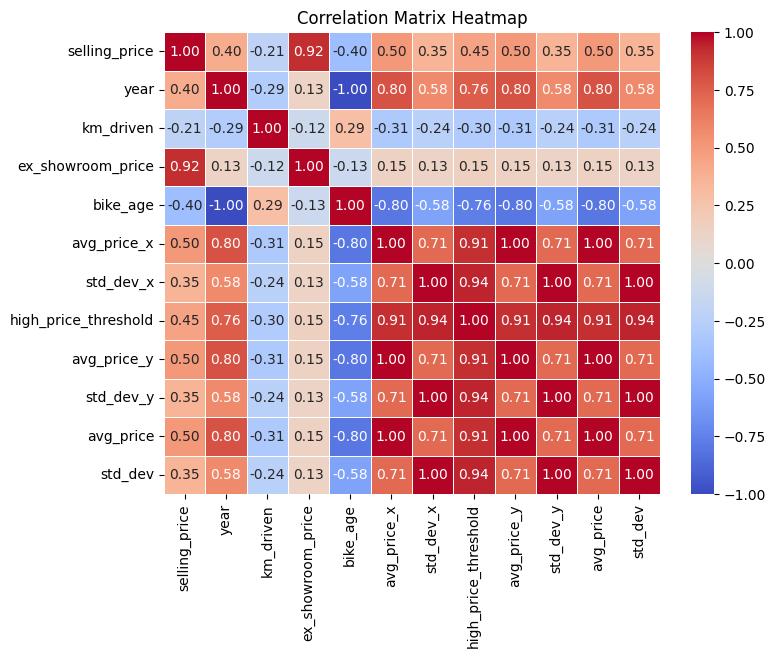

In [91]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap")

# Show plot
plt.show()